In [170]:
# Load the test image using OpenCV's imread() function.
import copy
import cv2
import random
import matplotlib.pyplot as plt

img = cv2.imread('data/train/' + str(random.randint(1,33402))+ '.png')
img_cpy = copy.copy(img)

In [171]:
#Convert the image to grayscale using OpenCV's cvtColor() function.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [172]:
#Apply a threshold to the image to make the digits more prominent using OpenCV's threshold() function
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [173]:
#Find contours in the image using OpenCV's findContours() function.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [174]:
digits = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 10 and h > 10:
        digits.append((x, y, w, h))
        contoured = cv2.rectangle(img_cpy, (x,y), (x+w, y+h), (0, 255, 0), 1)

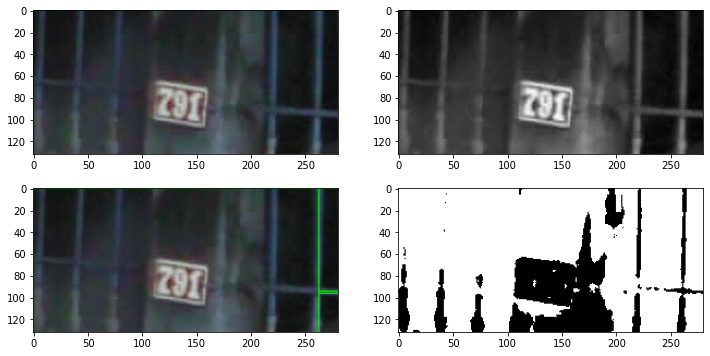

In [175]:
f, axarr = plt.subplots(2,2, figsize=(12, 6))
axarr[0,0].imshow(img)
axarr[0,1].imshow(gray, cmap='gray')
axarr[1,0].imshow(img_cpy)
axarr[1,1].imshow(thresh, cmap='gray')

In [176]:
#Loop through the contours and filter out the ones that are too small to be digits.
digits = sorted(digits, key=lambda x: x[0])

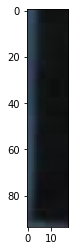

In [177]:
#Sort the digits from left to right based on their x-coordinate.
for i, digit in enumerate(digits):
    x, y, w, h = digit
    roi = img[y:y+h, x:x+w]
    cv2.imwrite(f'digit_{i}.png', roi)
    # Read and show the digit image
    digit_img = cv2.imread(f'digit_{i}.png')
    plt.imshow(digit_img)
    cv2.waitKey(5000)  # Display the image for 5000 milliseconds (5 seconds) or until a key is pressed